_Please skip and go to the coding part if you already are aware of Modern Portfolio Theory_ <br>
Source: FRM exam PREP Schweser Note - Foundations of Risk Management, investopedia, blog "Python For Finance" 

<img src="res.png" alt="outpt" width="2000"/>

### `Modern Portfolio Theroy (MPT)`

_Modern portfolio theory (MPT)_ is a theory on how risk-averse investors can construct portfolios to **maximize expected return based on a given level of market risk.** 

**1) Expected Return and Volatility of a Two-Asset Portfolio** <br>
The expected return on a portfolio is a weighted average of the expected returns on the individual assets taht are included in the portfolio. For example, for a two-asset portfolio:

$$ E(R_p) = w_1E(R_1) + w_2E(R_2) $$ <br>
where: <br> 
$E(R_p)$ = expected return on Portfolio P  <br>
$w_i$    = weight of the portfolio allocated to Asset i  <br>
$E(R_i)$ = expected retrun on Asset i  <br>

$$ \sigma_p^2 = w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2Cov_{1,2}  $$ <br>
where: <br> 
$\sigma^2_p$ = variance of the returns for Portfolio P  <br>
$\sigma^2_1$ = variance of the returns for Asset 1  <br>
$\sigma^2_2$ = variance of the returns for Asset 2  <br>
$w_i$    = weight of the portfolio allocated to Asset i  <br>
$Cov_{1,2}$ = covariance between the returns of the two assets  <br>
<br>
<br>
<center> Effects of Correlation on Portfolio Risk (Portfolio Possbility Curve) </center>

![alt text](corr-eff.gif "Effects of Correlation on Portfolio Risk")

where: <br> 
$\rho=-1$ : Perfect negative correlation, two linear equations, zero volatility  <br>
$\rho=0$  : Zero correlation, a non-linear equation, impossible to construct a portfolio with zero volatility  <br>
$\rho=1$  : Perfect positive correlation, a straight line, indicating no diversification  <br>

As we can see, it is able to pursue the higher expected return with the minimum risk by the effect of the diversification.




**2) Expected Return and Volatility of a Multi-Assets Portfolio** <br>
Plotting all risky assets and potential combinations of risky assets will result in a graph below:

![alt text](ef.jpg "Efficient Frontier")
<div style="text-align: center"> source: wikipedia  </div> 

**Efficient portfolios** are portfolios that have <br>
- minumum risk of all portfolios with the same expected return and 
- maximum expected return for all portfolios with the same risk.

The **efficient frontier** is a plot of the expected return and risk combinations of all efficient portfolios, all of which lie along the upper-left portion of the possible portfolios. 



====================================================================================================================== <br>

Today, I am going to build an efficient portfolio with optimized weights between assets with the highest Sharpe ratio using Monte-Carlo simulation. If I have chance, I will continue delve into CML and calculating the beta in the The Capital Asset Pricing Model(CAPM) another time. 

With Monte-Carlo approach, we can discover the optimal weights by simply creating a large number of random portfolios, all with varying combinations of stock weights. Then it leads us to calculate the best Sharpe ratio from each cases.

My portfolio consists of five stocks and will be running 100K simulations to obtain the best result. All results will be plotted and the highest Sharpe ratio be highlighted. Let's get it!

## 1. EDA

In [1]:
# Environment Setting
from pandas_datareader import data, wb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
%matplotlib inline

# Set start and end date
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2019,12,31)

Stocks chosen:
- Apple
- Tesla
- American Airlines
- Walmart
- Microsoft
- Wells Fargo
- AMD
- Johnson & Johnson
- Coca Cola
- Netflix

In [2]:
#Download stock data
stocks = ['AAL','AMD','AAPL','JNJ','KO','MSFT','NFLX','TSLA','WFC','WMT']
df = pd.DataFrame([data.DataReader(stock,"yahoo",start)['Adj Close'] for stock in stocks]).T
df.columns = stocks

In [3]:
#descriptive stats
df.describe()

,AAL,AMD,AAPL,JNJ,KO,MSFT,NFLX,TSLA,WFC,WMT
count,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,36.761223,18.751130,42.904644,116.204539,41.900434,90.553675,228.243892,71.451853,44.949786,84.123817
std,10.520271,17.992907,19.907225,19.450037,5.854628,47.001361,126.149123,59.433343,6.964699,22.292952
min,9.040000,1.620000,21.202499,79.246399,32.234833,35.983208,45.547142,28.733999,22.437664,49.833813
25%,31.176110,4.405000,27.581776,101.198341,37.197103,50.377223,106.644999,45.119000,43.041306,64.772860
50%,38.301626,12.645000,38.365646,120.824818,40.889742,79.425255,191.990005,54.762001,46.371107,80.187122
75%,44.756744,27.887499,50.311800,131.021484,45.268563,118.027973,341.049995,67.798000,48.852615,99.054884
max,56.988728,92.180000,134.179993,153.830002,59.070591,231.649994,556.549988,498.320007,59.477455,147.679993


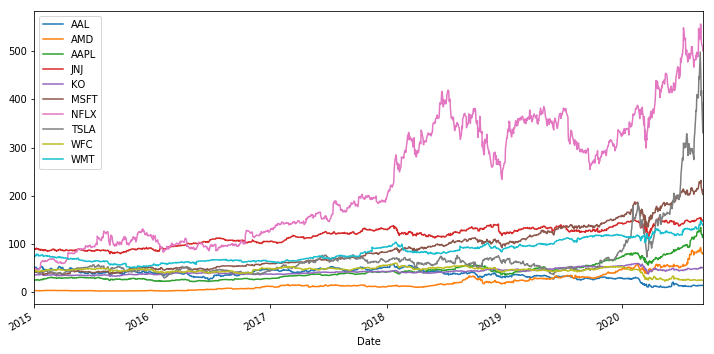

In [4]:
#5 years of Adjusted Close price line graph
df.plot(legend=True, figsize=(12,6))

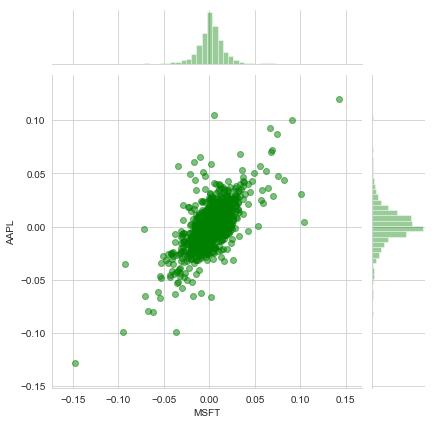

In [5]:
#correlation between two assets: Apple and Microsoft (positive correlation)
sns.set_style("whitegrid")
sns.jointplot(df['MSFT'].pct_change(),df['AAPL'].pct_change(),kind='scatter',color='green', alpha=0.5)

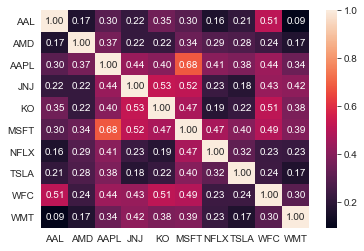

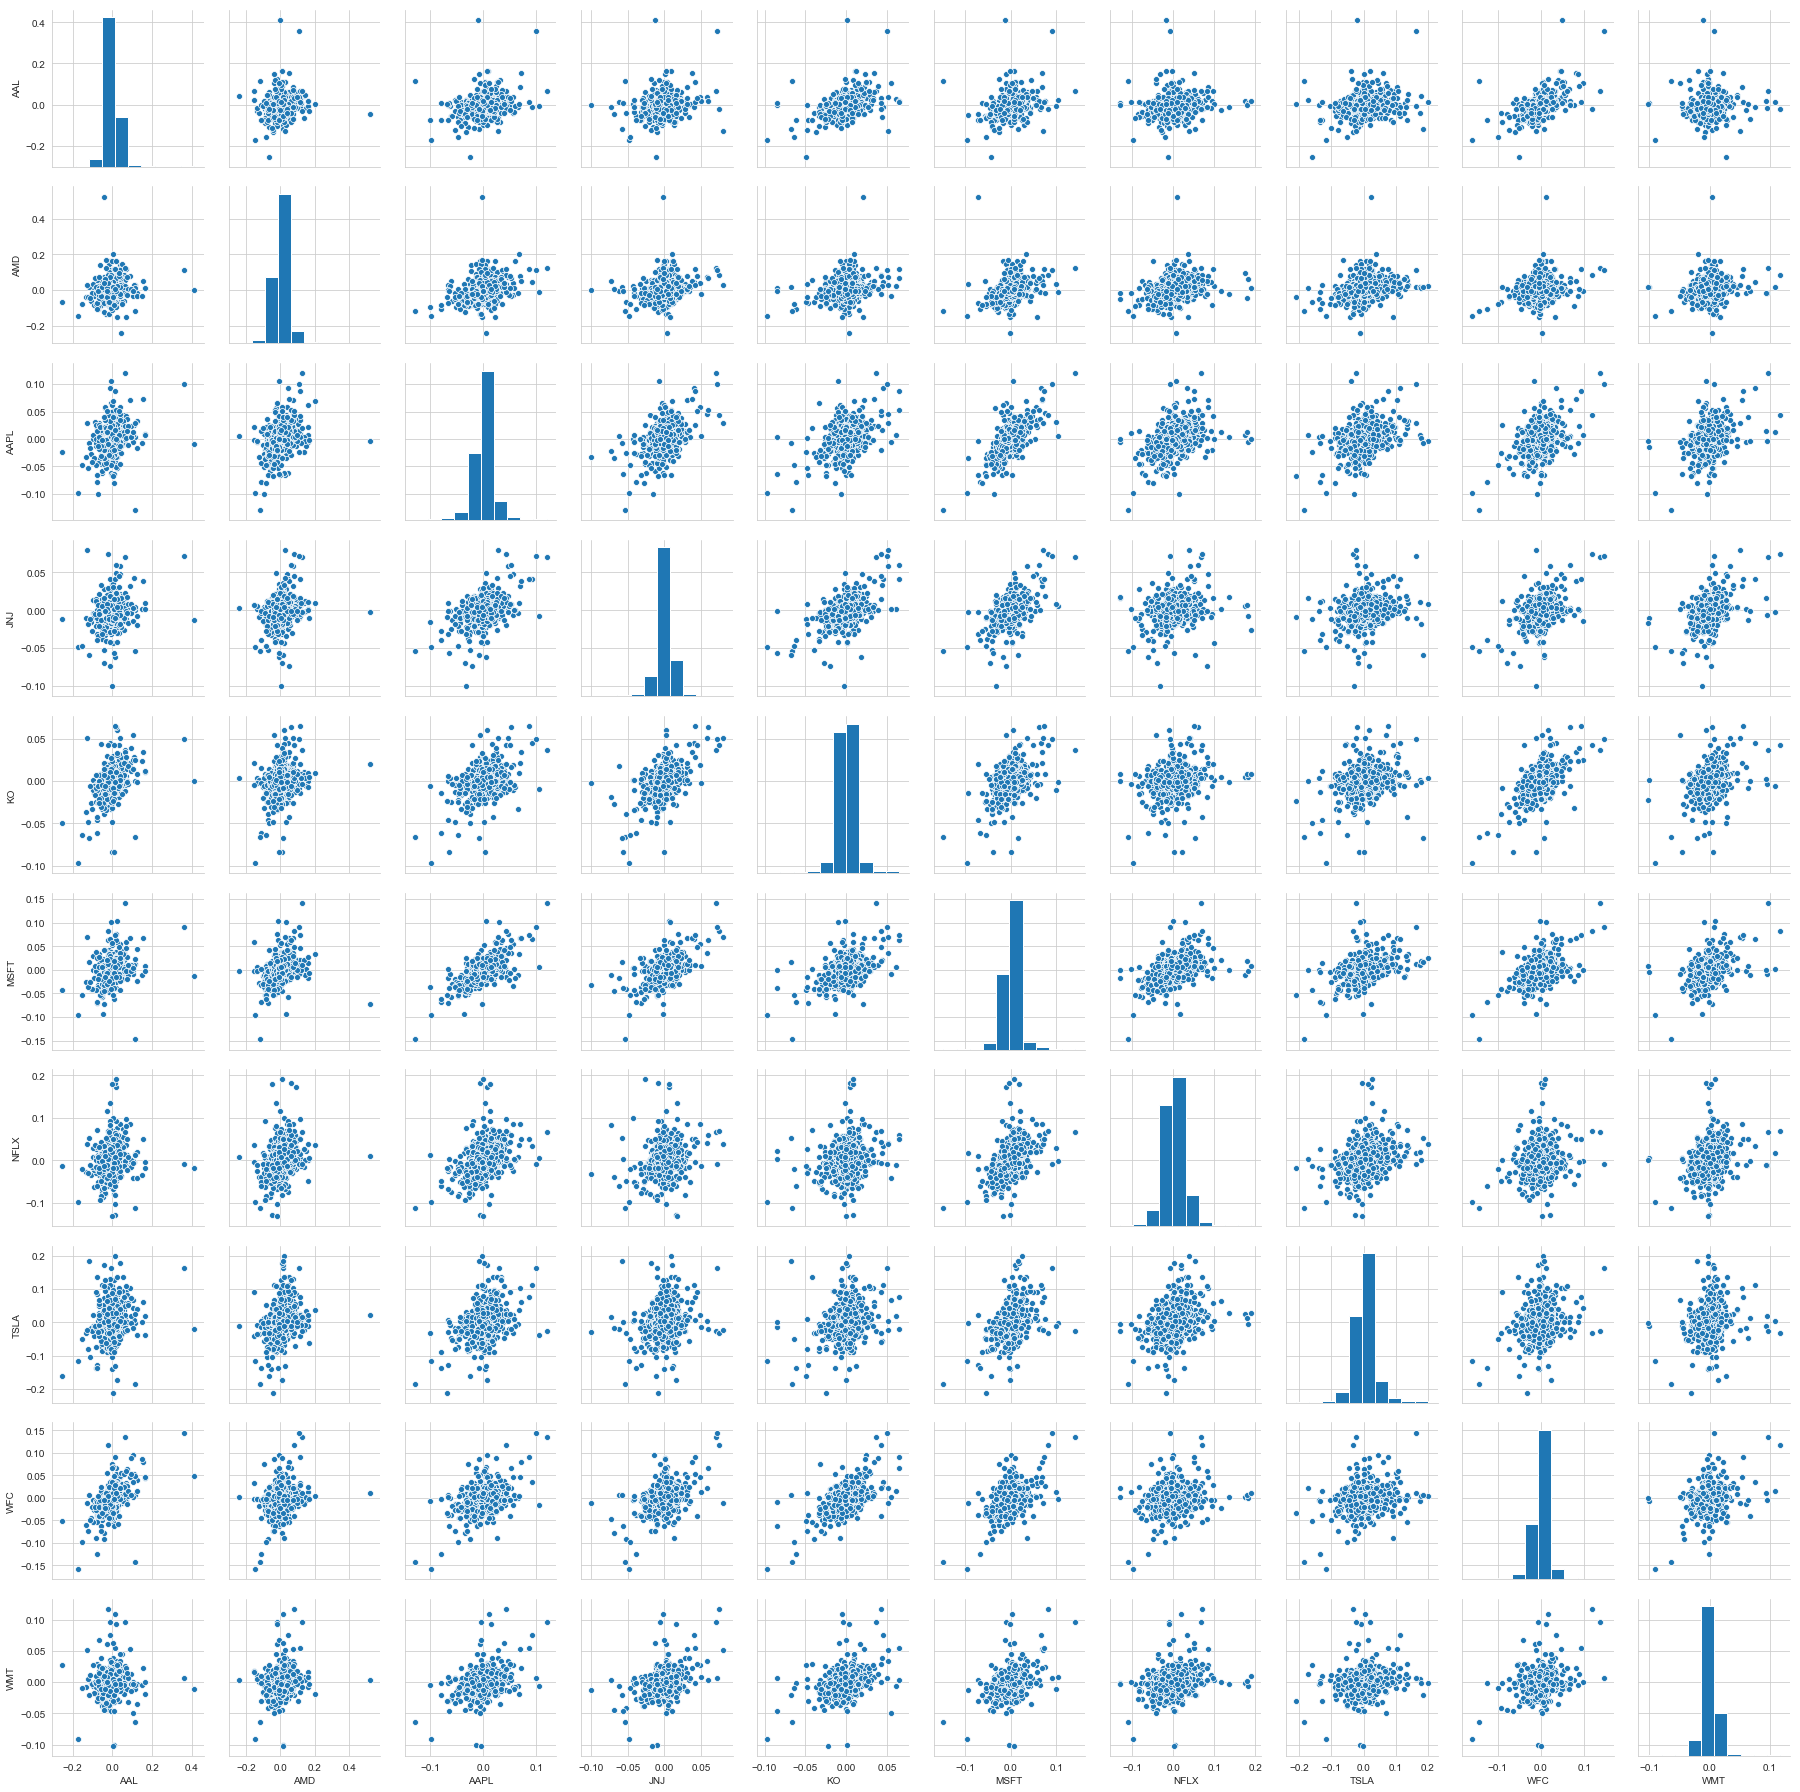

In [6]:
#correlations 
#: not strong but somewhat correlated between IT assets
pct_change_df = df.pct_change()
df_corr= pct_change_df.dropna().corr()
sns.heatmap(df_corr, annot=True, fmt='.2f')
plt.show()
sns.pairplot(pct_change_df.dropna())

## 2. Return and Volatility in Varing Weights

#### (1) Individual Asset's Annual Return and Volatility 


In [7]:
for stock in stocks:
    returns = df[stock].pct_change()
    mean_return = returns.mean()
    return_stdev = returns.std()
    annual_return = round(mean_return * 252,2)
    annual_stdev = round(return_stdev * np.sqrt(252),2)
    print(stock)
    print ('-Annual mean return:', annual_return)
    print('-Annual volatility:', annual_stdev)

AAL
-Annual mean return: -0.1
-Annual volatility: 0.53
AMD
-Annual mean return: 0.81
-Annual volatility: 0.65
AAPL
-Annual mean return: 0.32
-Annual volatility: 0.29
JNJ
-Annual mean return: 0.11
-Annual volatility: 0.19
KO
-Annual mean return: 0.08
-Annual volatility: 0.19
MSFT
-Annual mean return: 0.33
-Annual volatility: 0.28
NFLX
-Annual mean return: 0.5
-Annual volatility: 0.43
TSLA
-Annual mean return: 0.53
-Annual volatility: 0.55
WFC
-Annual mean return: -0.06
-Annual volatility: 0.31
WMT
-Annual mean return: 0.14
-Annual volatility: 0.22


#### (2) Portfolio's Annual Return and Volatility 

In [8]:
#daily returns
rets = df.pct_change()

#mean and covariance
mean_daily_rets = rets.mean()
cov_matrix = rets.cov()

#weights - 10% each
weights = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]) 

#annual portfolio return and volatility
prf_rets = np.sum(mean_daily_rets*weights*252)
prf_std = np.sqrt(weights.T@(cov_matrix@weights))*np.sqrt(252)

print('Portfolio expected annualized return: {:.2f} and volatility is {:.2f}'.format(prf_rets,prf_std))

Portfolio expected annualized return: 0.26 and volatility is 0.22


#### (3) Optimal Annual Return and Volatility using Monte-Carlo simulation




In [9]:
num_sim = 10000
results = np.zeros((3+len(stocks),num_sim))

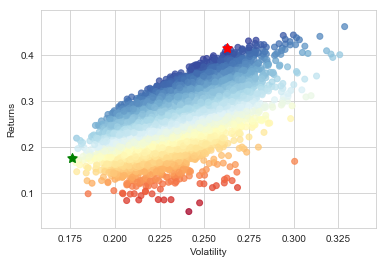

In [10]:
for i in range(num_sim):
    weights = np.random.random(10)
    weights = weights/sum(weights)
    
    prf_rets = np.sum(mean_daily_rets*weights*252)
    prf_std = np.sqrt(weights.T@(cov_matrix@weights))*np.sqrt(252)
    
    results[0,i] = prf_rets
    results[1,i] = prf_std
    results[2,i] = results[0,i]/results[1,i]  #did not include Sharpe ratio for the simplicity
    
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
resultsDF = pd.DataFrame(results.T, columns=['returns','stdev','sharpe', 
                                             stocks[0], stocks[1], stocks[2], stocks[3], 
                                             stocks[4], stocks[5], stocks[6], stocks[7], 
                                             stocks[8], stocks[9]])

#locate position of portfolio with highest Sharpe Ratio
max_sharpe = resultsDF.iloc[resultsDF['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol = resultsDF.iloc[resultsDF['stdev'].idxmin()]

plt.scatter(resultsDF.stdev, resultsDF.returns, c=resultsDF.sharpe, cmap='RdYlBu', alpha=0.75)
plt.xlabel('Volatility')
plt.ylabel('Returns')
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='r',s=100)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol[1],min_vol[0],marker=(5,1,0),color='g',s=100)
plt.savefig('res.png') 

As we can see above, the effects of choosing the best weights is critical since the portfolio's returns and volatility depends on optimal weights of each assets. 

In [11]:
print(pd.DataFrame(max_sharpe.rename('max_sharpe')))

         max_sharpe
returns    0.416256
stdev      0.262507
sharpe     1.585692
AAL        0.001044
AMD        0.199267
AAPL       0.035148
JNJ        0.140414
KO         0.041525
MSFT       0.108691
NFLX       0.219636
TSLA       0.120848
WFC        0.008146
WMT        0.125280


In [12]:
print(pd.DataFrame(min_vol.rename('min_volatility')))

         min_volatility
returns        0.175844
stdev          0.176044
sharpe         0.998866
AAL            0.005626
AMD            0.068327
AAPL           0.053068
JNJ            0.186629
KO             0.200911
MSFT           0.099503
NFLX           0.004170
TSLA           0.000458
WFC            0.092752
WMT            0.288557
